In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [3]:
################################## adressa ###########################################

In [4]:
result = pd.read_csv(r"Approx\heuristic_adressa.csv")

In [5]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Initial winner,Preferred winner,Number Ballots add,Heuristic v2 margin,Upper limit margin,heuristic v2 runtime,baseline runtime,avg heap modify
0,adressa=500_ballot=4,500,491,4,11,0,8,3,8,0.055975,0.168377,470
1,adressa=500_ballot=4,500,491,4,11,0,128,3,128,0.075250,0.708381,470
2,adressa=1000_ballot=4,1000,985,4,0,11,64,27,64,0.125138,0.901492,930
3,adressa=1000_ballot=4,1000,985,4,0,4,256,91,256,0.106625,1.400293,943
4,adressa=5000_ballot=4,5000,4907,4,0,12,2048,497,2048,0.799634,12.130884,4690
5,adressa=5000_ballot=4,5000,4907,4,0,2,2048,504,2048,0.645990,12.679880,4786
6,adressa=10000_ballot=4,10000,9775,4,0,11,8192,1577,8192,1.145244,29.840377,9794
7,adressa=10000_ballot=4,10000,9775,4,0,11,4096,1577,4096,1.568830,24.919550,9794
8,adressa=50000_ballot=4,50000,26656,4,0,2,16384,3089,16384,5.057256,105.435720,25465
9,adressa=50000_ballot=4,50000,26656,4,0,18,16384,5079,16384,4.886398,106.053991,25367


In [6]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Initial winner', 'Preferred winner',
       'Number Ballots add', 'Heuristic v2 margin', 'Upper limit margin',
       'heuristic v2 runtime', 'baseline runtime', 'avg heap modify '],
      dtype='object')

In [7]:
avg = result.groupby(['Number_Of_Candidates'])['Dataset', 'Number_of_voters',
       'Max_Ballot_length', 'Initial winner', 'Preferred winner',
       'Number Ballots add', 'Heuristic v2 margin', 'Upper limit margin',
       'heuristic v2 runtime', 'baseline runtime', 'avg heap modify '].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [8]:
avg.to_csv('Approx\heuristic_adressa_avg.csv')
avgDf = pd.read_csv('Approx\heuristic_adressa_avg.csv')
avgDf.colums = ['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Initial winner', 'Preferred winner',
       'Number Ballots add', 'Heuristic v2 margin', 'Upper limit margin',
       'heuristic v2 runtime', 'baseline runtime', 'avg heap modify ']

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  




x  = avgDf['Number_Of_Candidates'].to_list()[2:]
y = avgDf['Heuristic v2 margin'].to_list()[2:]
z = avgDf['Upper limit margin'].to_list()[2:]
#u = avgDf['Blom_margin'].to_list()

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ticklabels = []
for i in x:
    #s = "n="+str(int(i/1000)) + "k"
    s = str(int(i/1000)) + "k"
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xlabel('# candidates')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
plt.yticks([5000,15000,30000], ['5k','15k','30k'])
ax.tick_params(axis='both', which='major')

ax.legend( (rects1[0], rects2[0]), ('AlgApprx', 'Random') , loc="upper left")
plt.ylim(0,30000)
plt.savefig('Figures/approx_vs_random_margin_comparison_news.pdf',dpi=2024,bbox_inches='tight')
plt.show()

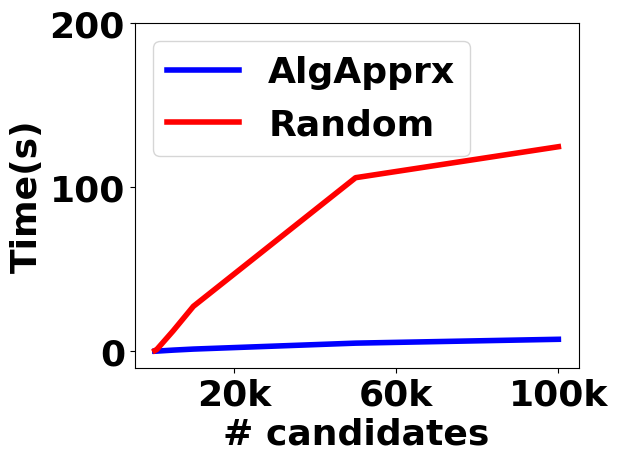

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristic v2 runtime'].to_list()
z = avgDf['baseline runtime'].to_list()
#u = avgDf['Blom_margin'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=bColor,linewidth=4)
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Time(s)')
plt.xlabel('# candidates')
plt.xticks([20000,60000,100000], ['20k','60k','100k'])
plt.ylim(-200*5/100,200)
plt.legend(["AlgApprx","Random"],loc='upper left')
fig.savefig("Figures/approx_vs_random_runtime_comparison_news.pdf",dpi=2024,bbox_inches='tight')
plt.show()

In [12]:
result = pd.read_csv(r"Approx\heuristic_random.csv")

In [13]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Initial winner,Preferred winner,Number Ballots add,Heuristic v2 margin,Upper limit margin,heuristic v2 runtime,baseline runtime,avg heap modify
0,rand=10000_ballot=4,10000,9994,4,7486,2284,8,6,8,0.580413,2.417661,202
1,rand=50000_ballot=4,50000,49995,4,16543,13988,8,1,8,3.136842,8.949874,1007
2,rand=100000_ballot=4,100000,99994,4,35493,53438,16,14,16,6.971639,29.843294,1940
3,rand=500000_ballot=4,500000,372233,4,9402,17513,32,17,32,32.217139,226.030444,21899
4,rand=1000000_ballot=4,1000000,999999,4,105671,10042,32,15,32,71.281321,405.231507,58604


In [14]:
avg = result.groupby(['Number_Of_Candidates'])['Dataset', 'Number_of_voters',
       'Max_Ballot_length', 'Initial winner', 'Preferred winner',
       'Number Ballots add', 'Heuristic v2 margin', 'Upper limit margin',
       'heuristic v2 runtime', 'baseline runtime', 'avg heap modify '].mean()
avg.to_csv('Approx\heuristic_syn_avg.csv')
avgDf = pd.read_csv('Approx\heuristic_syn_avg.csv')
avgDf.colums = ['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Initial winner', 'Preferred winner',
       'Number Ballots add', 'Heuristic v2 margin', 'Upper limit margin',
       'heuristic v2 runtime', 'baseline runtime', 'avg heap modify ']

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


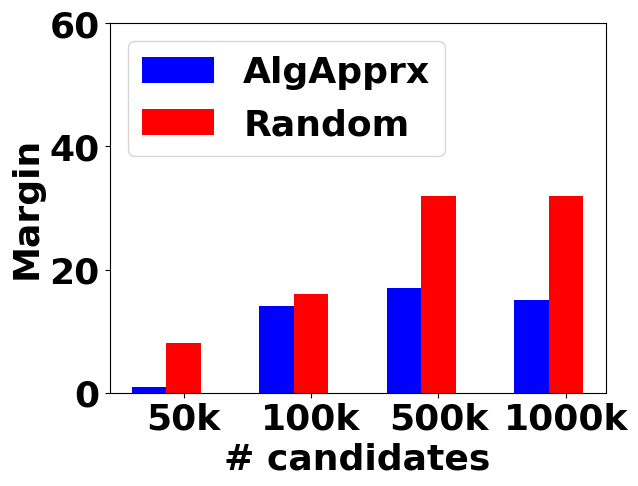

In [15]:


x  = avgDf['Number_Of_Candidates'].to_list()[1:]
y = avgDf['Heuristic v2 margin'].to_list()[1:]
z = avgDf['Upper limit margin'].to_list()[1:]
#u = avgDf['Blom_margin'].to_list()

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ticklabels = []
for i in x:
    #s = "n="+str(int(i/1000)) + "k"
    s = str(int(i/1000)) + "k"
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xlabel('# candidates')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major')

ax.legend( (rects1[0], rects2[0]), ('AlgApprx', 'Random'),loc="upper left" )
plt.ylim(0,60)
plt.savefig('Figures/approx_vs_random_margin_comparison_synthetic.pdf',dpi=2024,bbox_inches='tight')
plt.show()

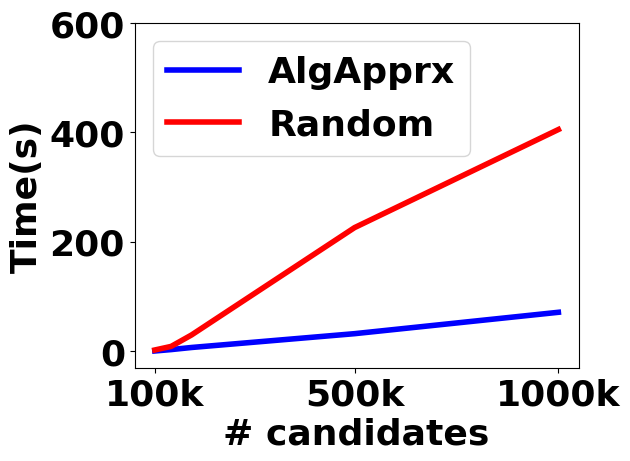

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = avgDf['Number_Of_Candidates'].to_list()
y = avgDf['heuristic v2 runtime'].to_list()
z = avgDf['baseline runtime'].to_list()
#u = avgDf['Blom_margin'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=bColor,linewidth=4)
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Time(s)')
plt.xlabel('# candidates')
plt.xticks([10000,500000,1000000], ['100k','500k','1000k'])
plt.ylim(-600*5/100,600)
plt.legend(["AlgApprx","Random"],loc='upper left')
fig.savefig("Figures/approx_vs_random_runtime_comparison_synthetic.pdf",dpi=2024,bbox_inches='tight')
plt.show()

In [17]:
result = pd.read_csv(r"Approx\heuristic_movielens.csv")

In [18]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Initial winner,Preferred winner,Number Ballots add,Heuristic v2 margin,Heuristic v1 margin,Upper limit margin,heuristic v2 runtime,heuristic v1 runtime,baseline runtime,avg heap modify
0,movieLens_movie=100_ballot=4,100,591,4,59,40,32,11,-1,32,0.070733,8.000000e-07,0.421563,471
1,movieLens_movie=200_ballot=4,200,600,4,175,40,32,2,-1,32,0.043770,3.000000e-07,0.487641,467
2,movieLens_movie=500_ballot=4,500,607,4,40,175,2,2,-1,2,0.084669,5.000000e-07,0.479830,430
3,movieLens_movie=800_ballot=4,800,608,4,175,311,16,8,-1,16,0.107841,4.000000e-07,0.420621,396
4,movieLens_movie=1000_ballot=4,1000,609,4,175,99,32,7,-1,32,0.083257,5.000000e-07,0.651545,364


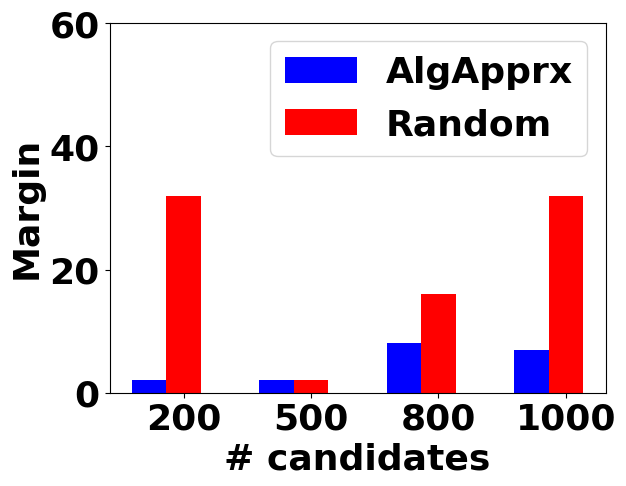

In [19]:


x  = result['Number_Of_Candidates'].to_list()[1:]
y = result['Heuristic v2 margin'].to_list()[1:]
z = result['Upper limit margin'].to_list()[1:]
#u = avgDf['Blom_margin'].to_list()

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ticklabels = []
for i in x:
    #s = "n="+str(int(i/1000)) + "k"
    s = str(int(i)) 
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xlabel('# candidates')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major')

ax.legend( (rects1[0], rects2[0]), ('AlgApprx', 'Random') )
plt.ylim(0,60)
plt.savefig('Figures/approx_vs_random_margin_comparison_movie.pdf',dpi=2024,bbox_inches='tight')
plt.show()

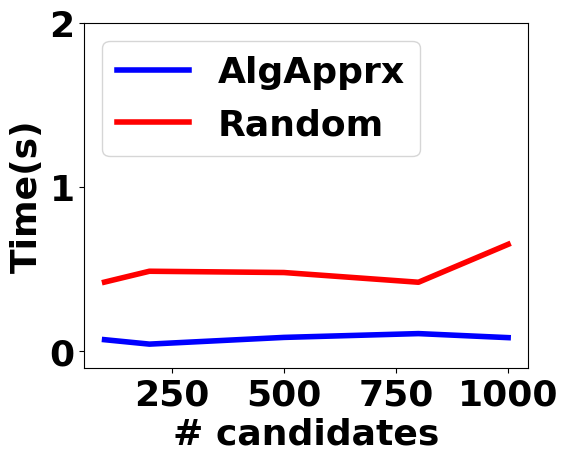

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = result['Number_Of_Candidates'].to_list()
y = result['heuristic v2 runtime'].to_list()
z = result['baseline runtime'].to_list()
#u = avgDf['Blom_margin'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=bColor,linewidth=4)
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Time(s)')
plt.xlabel('# candidates')
#plt.xticks([10000,500000,1000000], ['100k','500k','1000k'])
plt.ylim(-2*5/100,2)
plt.legend(["AlgApprx","Random"],loc='upper left')
fig.savefig("Figures/approx_vs_random_runtime_comparison_movie.pdf",dpi=2024,bbox_inches='tight')
plt.show()

In [196]:
result = pd.read_csv(r"Approx\heuristic_books.csv")

In [197]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Initial winner,Preferred winner,Number Ballots add,Heuristic v2 margin,Upper limit margin,heuristic v2 runtime,baseline runtime,avg heap modify
0,book=1000_ballot=4,1000,14868,4,10,12,256,88,256,1.210329,14.796395,9016
1,book=5000_ballot=4,5000,26866,4,10,17,256,101,256,2.229850,32.631556,14820
2,book=10000_ballot=4,10000,33803,4,10,18,256,115,256,2.607834,40.380809,17069
3,book=15000_ballot=4,15000,38287,4,10,20,128,49,128,3.735924,41.428215,18357
4,book=20000_ballot=4,20000,41624,4,10,3,256,74,256,4.871428,56.635687,19010


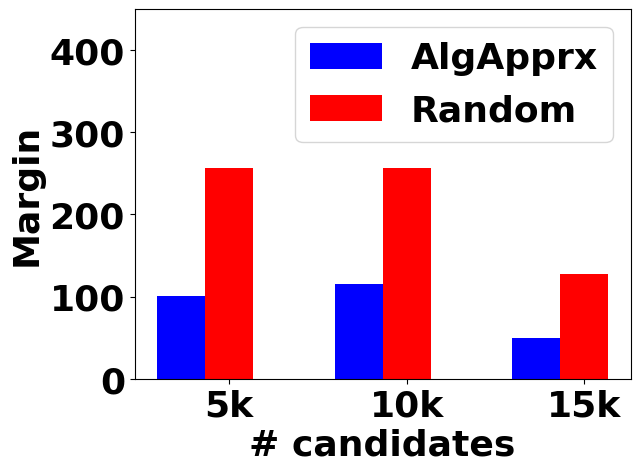

In [198]:


x  = result['Number_Of_Candidates'].to_list()[1:-1]
y = result['Heuristic v2 margin'].to_list()[1:-1]
z = result['Upper limit margin'].to_list()[1:-1]
#u = avgDf['Blom_margin'].to_list()

N = len(x)
ind = np.arange(N)  # the x locations for the groups
width = 0.27     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ticklabels = []
for i in x:
    #s = "n="+str(int(i/1000)) + "k"
    s = str(int(i/1000)) + "k"
    ticklabels.append(s)


rects1 = ax.bar(ind, y, width, color=hColor)
rects2 = ax.bar(ind+width, z, width, color=bColor)
#rects3 = ax.bar(ind+width*2, u, width, color=bColor)

ax.set_ylabel('Margin')
ax.set_xlabel('# candidates')
ax.set_xticks(ind+width)
ax.set_xticklabels( ticklabels )
ax.tick_params(axis='both', which='major')

ax.legend( (rects1[0], rects2[0]), ('AlgApprx', 'Random') )
plt.ylim(0,450)
plt.savefig('Figures/approx_vs_random_margin_comparison_book.pdf',dpi=2024,bbox_inches='tight')
plt.show()

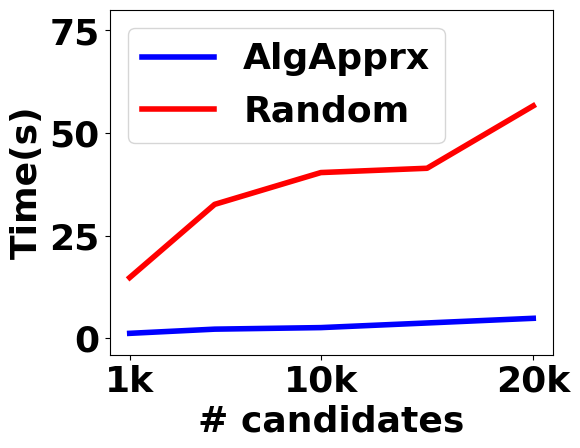

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()

x  = result['Number_Of_Candidates'].to_list()
y = result['heuristic v2 runtime'].to_list()
z = result['baseline runtime'].to_list()
#u = avgDf['Blom_margin'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=bColor,linewidth=4)
#plt.plot(x,u)

# create an index for each tick position

plt.ylabel('Time(s)')
plt.xlabel('# candidates')
plt.xticks([1000,10000,20000], ['1k','10k','20k'])
plt.ylim(-80*5/100,80)
plt.legend(["AlgApprx","Random"],loc='upper left')
fig.savefig("Figures/approx_vs_random_runtime_comparison_book.pdf",dpi=2024,bbox_inches='tight')
plt.show()